# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sdf
import re
import os, glob
import peakutils
from plot import *
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams["font.size"] = 18
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 18

# Creating Data

In [3]:
data_dir = [f"run_{i}" for i in range(1, 11)]
data_dir += ["run"]

In [4]:
# fig_dir = "data"
# plot_density = False
# plot_ffts = True
# plot_fields2d = False
# plot_fields_with_time = False
# show_figs = False
# save_figs = False
# return_data = True
# for d in data_dir:
#     print(d)
#     main(
#         data_dir=d,
#         save_figs=save_figs,
#         show_figs=show_figs,
#         plot_density=plot_density,
#         plot_ffts=plot_ffts,
#         plot_fields2d=plot_fields2d,
#         plot_fields_with_time=plot_fields_with_time,
#         fig_dir=fig_dir,
#         return_data=return_data,
#     )

run_1


Getting Data...: 100%|██████████| 1669/1669 [00:01<00:00, 834.78it/s]


run_2


Getting Data...: 100%|██████████| 1669/1669 [00:09<00:00, 180.96it/s]


run_3


Getting Data...: 100%|██████████| 1669/1669 [00:08<00:00, 187.23it/s]


run_4


Getting Data...: 100%|██████████| 1669/1669 [00:08<00:00, 186.28it/s]


run_5


Getting Data...: 100%|██████████| 1669/1669 [00:08<00:00, 198.80it/s]


run_6


Getting Data...: 100%|██████████| 1669/1669 [00:08<00:00, 188.87it/s]


run_7


Getting Data...: 100%|██████████| 1669/1669 [00:09<00:00, 167.05it/s]


run_8


Getting Data...: 100%|██████████| 1669/1669 [00:08<00:00, 189.45it/s]


run_9


Getting Data...: 100%|██████████| 1669/1669 [00:08<00:00, 192.18it/s]


run_10


Getting Data...: 100%|██████████| 1669/1669 [00:08<00:00, 190.88it/s]


run


Getting Data...: 100%|██████████| 1669/1669 [00:08<00:00, 186.16it/s]


# Plotting

## Creating Function

In [65]:
data_files = glob.glob("data/*npz")
data_files.sort()

In [61]:
def read_data(file_path):
    data = np.load(file=file_path)
    fft = data["Ey_fft"]
    all_len = len(fft)
    omega = data["omegas"]
    return fft[all_len//2:], omega[all_len//2:]

In [66]:
def get_max_point(omega, fft, order = 3):
    total_length = (omega.max() - omega.min())
    points = len(omega)
    range_mid = int(order*points/total_length)
    offset = 15
    range_start = range_mid - offset
    range_end = range_mid + offset
    max_id = np.argmax(fft[range_start:range_end])
    return max_id + range_start

In [72]:
def get_peaks(data_dir, plot=True):
    fft, omega = read_data(data_dir)
    odrders_id = []
    for order in range(1, 21, 2):
        odrders_id.append(get_max_point(omega, fft, order))

    if plot:
        plt.plot(omega, fft)
        plt.scatter(omega[odrders_id], fft[odrders_id])
        plt.yscale("log")
        plt.title(data_dir.split("/")[-1].split(".")[0])
        plt.xlim(0,)
    return fft[odrders_id]

[1.00000000e+00 1.06599786e-02 2.10795893e-03 1.16590134e-03
 1.10617708e-03 8.59995997e-04 6.86013592e-04 2.18654405e-04
 3.56690733e-04 2.45657290e-04]


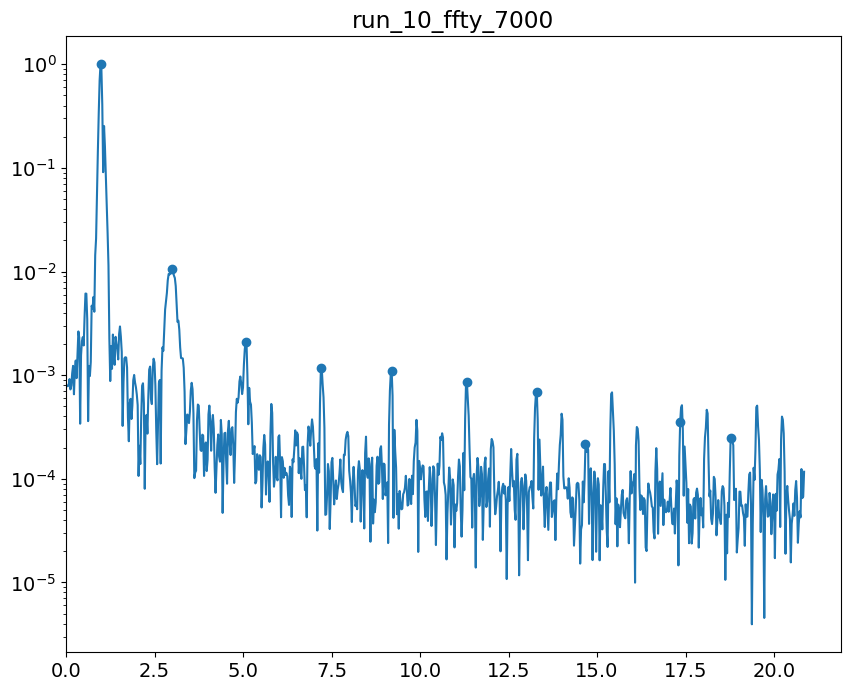

In [73]:
fs = get_peaks(data_files[0])
print(fs)

[1.00000000e+00 5.75611487e-02 2.70100778e-03 1.88756254e-03
 8.17174177e-04 1.06402738e-03 6.35137094e-04 3.87925357e-04
 2.22311614e-04 2.45608503e-04]


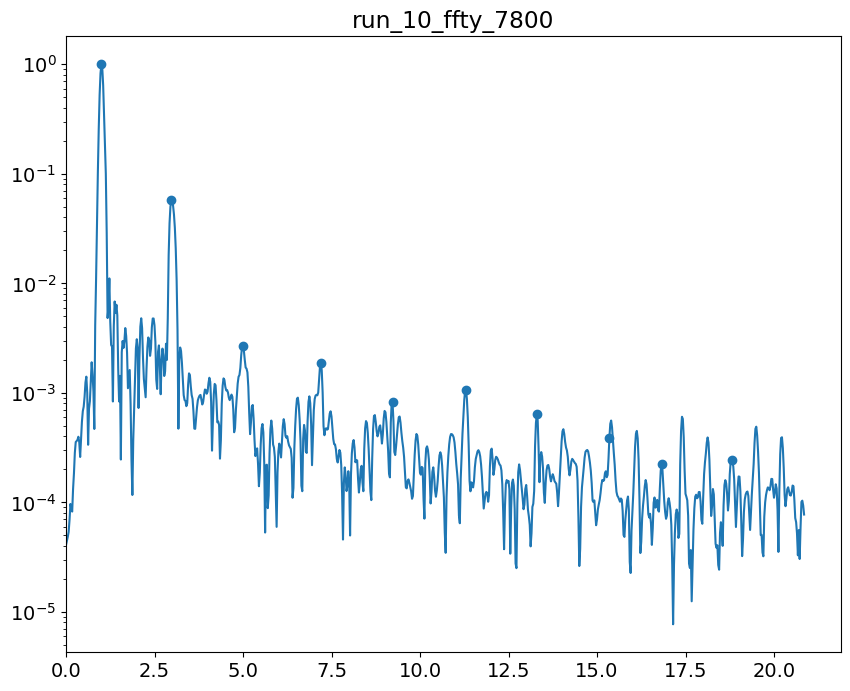

In [74]:
fs = get_peaks(data_files[3])
print(fs)

[1.00000000e+00 7.32719339e-03 2.10076863e-03 1.38837403e-03
 1.14441333e-03 8.40426829e-04 7.74349970e-04 3.42824778e-04
 2.27273831e-04 2.20538887e-04]


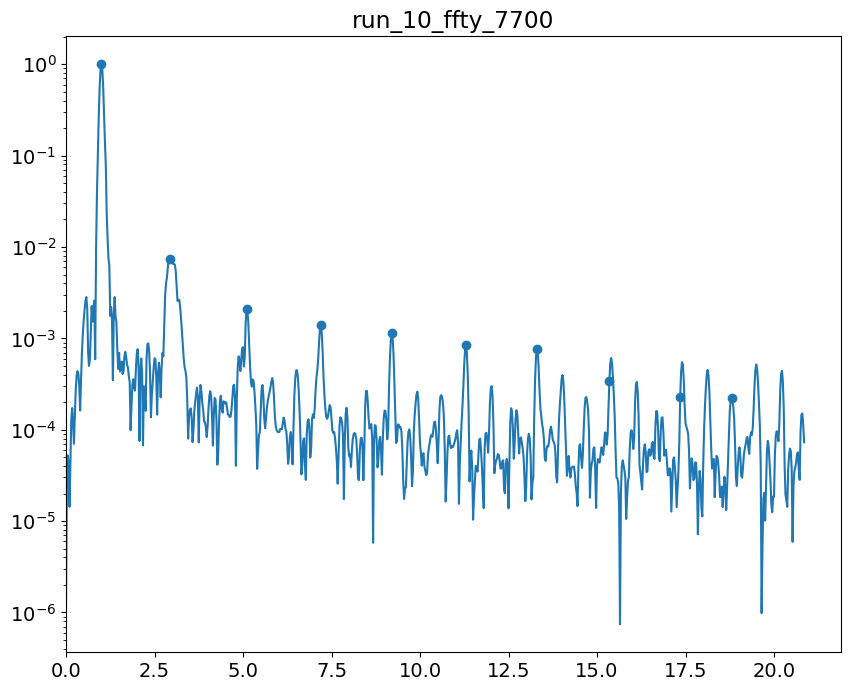

In [75]:
fs = get_peaks(data_files[2])
print(fs)

[1.00000000e+00 1.12799704e-02 2.37990514e-03 1.26018974e-03
 1.21320039e-03 8.18339011e-04 7.39678222e-04 2.04122582e-04
 1.98603543e-04 2.65065416e-04]


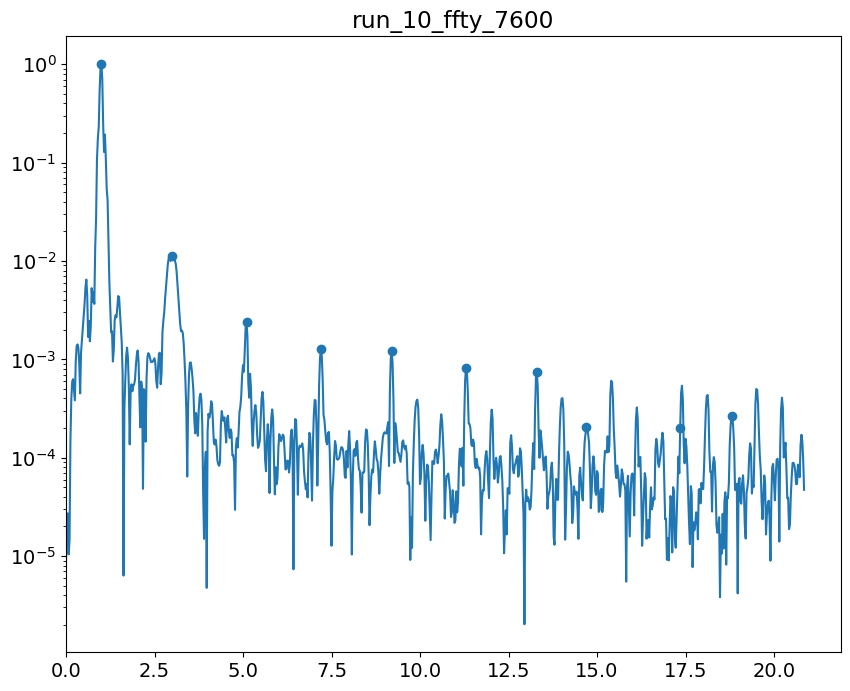

In [76]:
fs = get_peaks(data_files[1])
print(fs)

## Final Plots

In [141]:
data_files = glob.glob("data/*7700.npz")
data_files.sort()
data_files

['data/run_10_ffty_7700.npz',
 'data/run_1_ffty_7700.npz',
 'data/run_2_ffty_7700.npz',
 'data/run_3_ffty_7700.npz',
 'data/run_4_ffty_7700.npz',
 'data/run_5_ffty_7700.npz',
 'data/run_6_ffty_7700.npz',
 'data/run_7_ffty_7700.npz',
 'data/run_8_ffty_7700.npz',
 'data/run_9_ffty_7700.npz',
 'data/run_ffty_7700.npz']

In [151]:
def decode_ramp_length(data_dir):
    regex = re.compile(r".*run_(\d{0,2}).*")
    result = regex.findall(data_dir)[0]
    if result:
        return round(int(result)*0.1, 1)
    return 0

In [152]:
def one_result(data_files):
    ramp_lengths = np.array([decode_ramp_length(f) for f in data_files])
    fs = np.array([get_peaks(f, plot=False) for f in data_files])
    return ramp_lengths, fs

In [145]:
rl , fs = one_result(data_files)

In [154]:
def preprocess(id_, rl, fs):
    sort_id = np.argsort(rl)
    rl_ = rl[sort_id]
    f = fs[:, id_]
    f = f[sort_id]
    return rl_, f

In [155]:
# rl_, f = preprocess(4)
# plt.plot(rl_, f)
# rl_, f = preprocess(2)
# plt.plot(rl_, f)
# rl_, f = preprocess(3)
# plt.plot(rl_, f)

In [204]:
def final(node, remove_zero=False):
    data_files = glob.glob(f"data/*{str(node)}.npz")
    data_files.sort()
    if remove_zero:
        data_files = data_files[:-1]
    rl , fs = one_result(data_files)

    plt.figure()
    rl_, f = preprocess(1, rl, fs)
    plt.plot(rl_, f, ":", label="Order 3", linewidth = 2)

    rl_, f = preprocess(2, rl, fs)
    plt.plot(rl_, f, "-", label="Order 5")

    rl_, f = preprocess(3, rl, fs)
    plt.plot(rl_, f, "--", label="Order 7")

    rl_, f = preprocess(4, rl, fs)
    plt.plot(rl_, f, "-.", label="Order 9")

    plt.legend(fontsize = 20)
    # plt.title(node)
    plt.yscale("log")
    plt.xlabel("Length of Ramp [$\lambda$]")
    plt.ylabel("Amplitude")
    plt.xticks(np.arange(0, 1, 0.1))
    for tick in plt.gca().xaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    for tick in plt.gca().yaxis.get_major_ticks():
        tick.label.set_fontsize(22)
    plt.tight_layout()
    plt.savefig(f"images/ramp_{str(node)}.jpg")

/tmp/ipykernel_19822/1599023246.py:28: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(22)
/tmp/ipykernel_19822/1599023246.py:30: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(22)
/tmp/ipykernel_19822/1599023246.py:28: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(22)
/tmp/ipykernel_19822/1599023246.py:30: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(22)
/tmp/ipykernel_19822/1599023246.py:28: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.lab

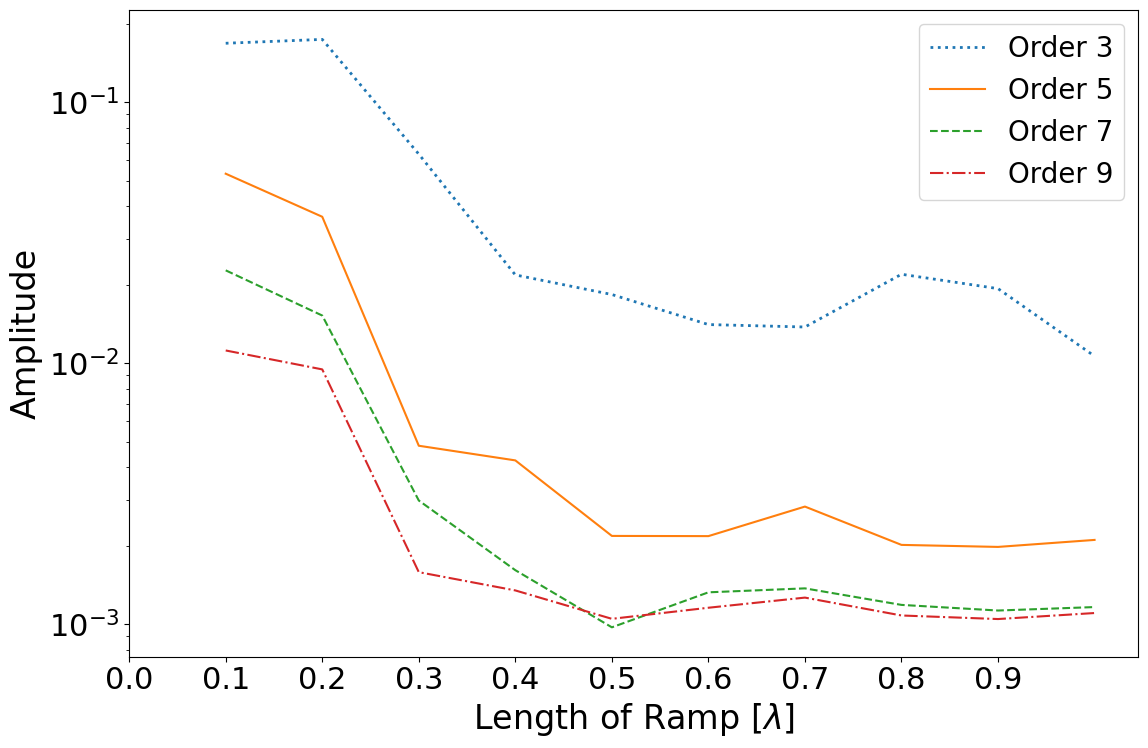

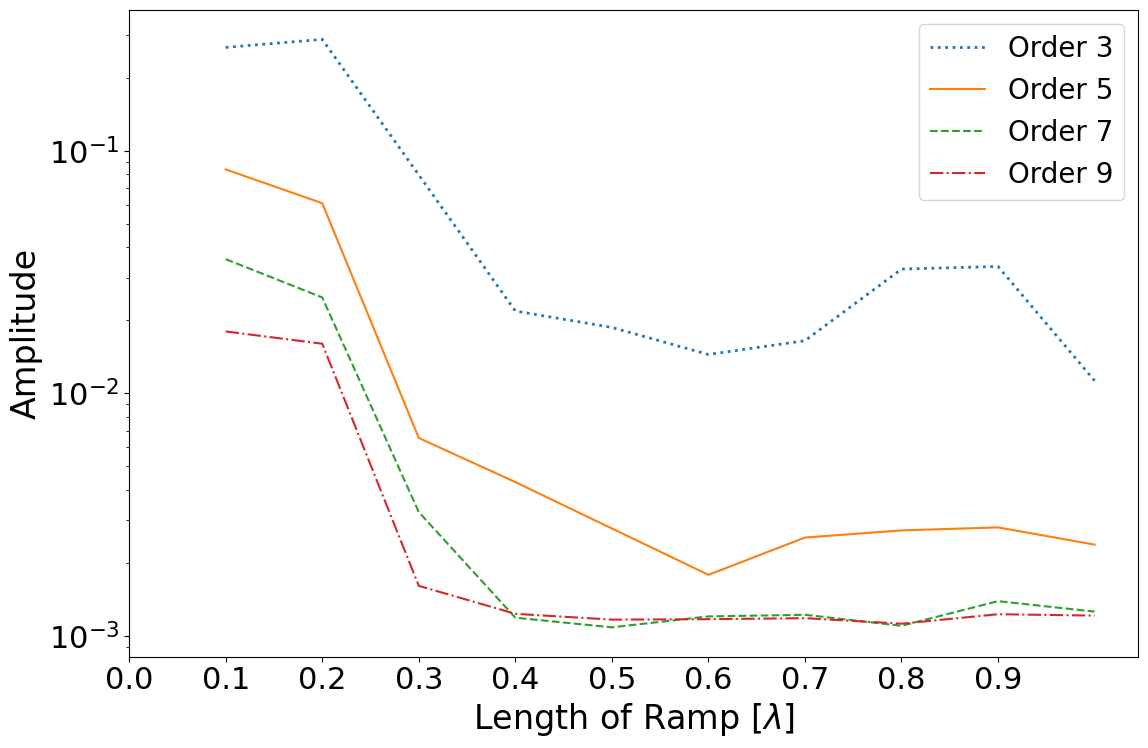

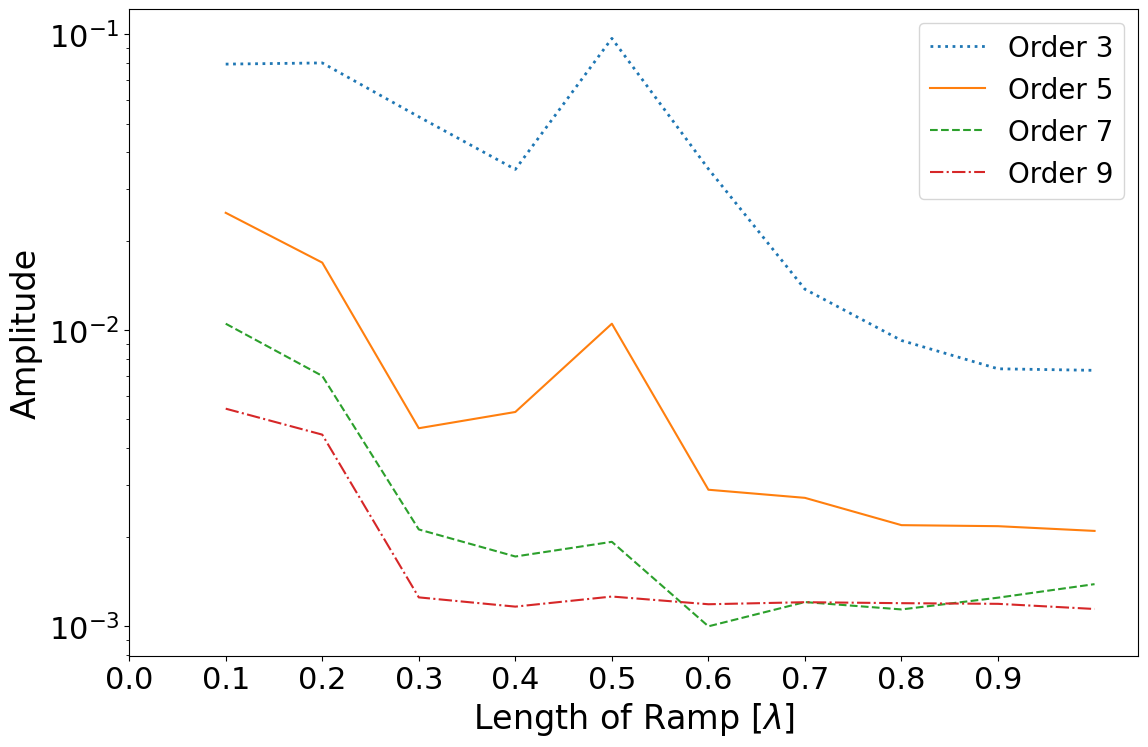

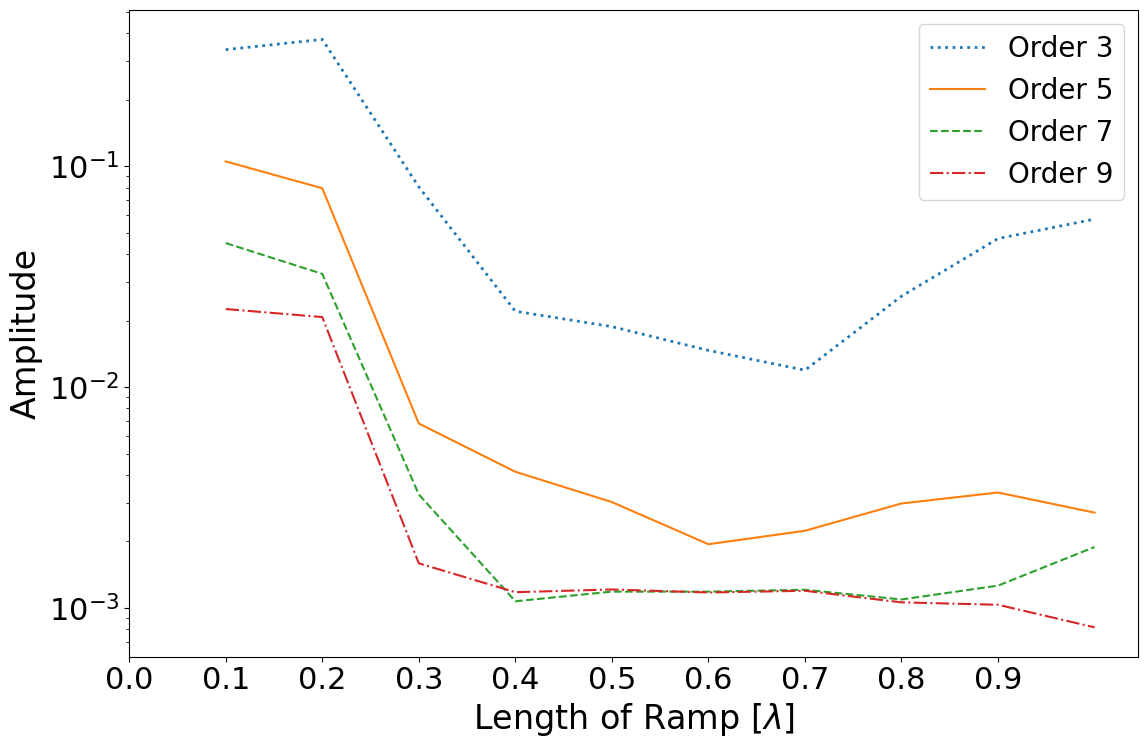

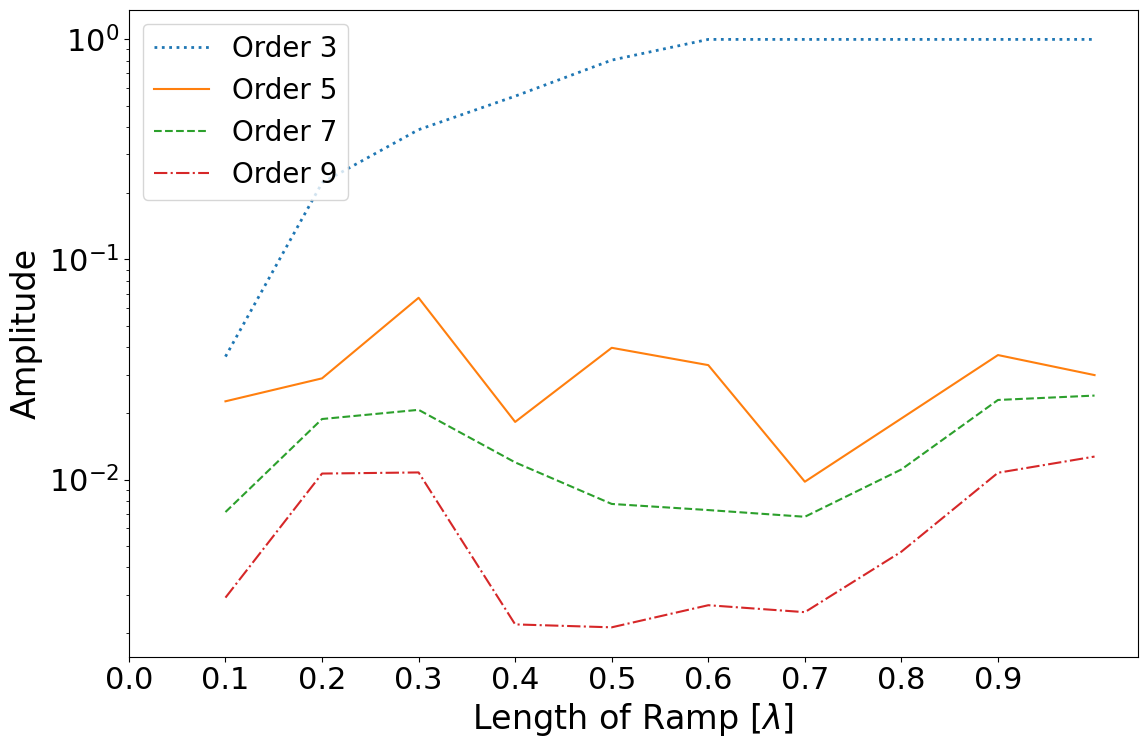

In [205]:
nodes = [7000, 7600, 7700, 7800, 8000]
for node in nodes:
    final(node, True)

## FFT Plot

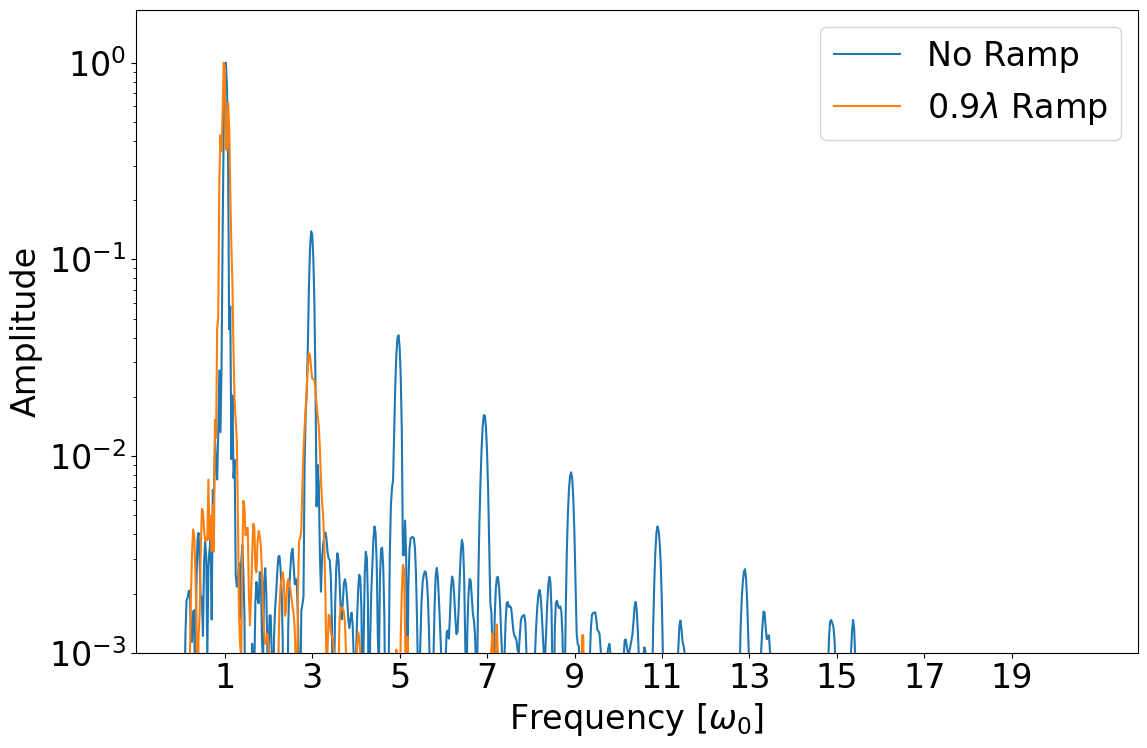

In [207]:
fft1, omega  = read_data("data/run_ffty_7600.npz")
fft2, omega = read_data("data/run_4_ffty_7600.npz")
fft3, omega = read_data("data/run_9_ffty_7600.npz")
plt.plot(omega, fft1, label="No Ramp")
# plt.plot(omega, fft2)
plt.plot(omega, fft3, label= "$0.9\lambda$ Ramp")
plt.yscale("log")
plt.legend()
plt.ylim(1e-3,)
plt.xticks(np.arange(1, 21, 2))
plt.xlabel("Frequency $[\omega_0]$")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.savefig("images/ramp.jpg");

# Density

In [2]:
def plot_one_d(dir, ax, title, label=True):
    DATA_DIR = dir
    with open(os.path.join(DATA_DIR, "input.deck"), "r") as myfile:
        data = myfile.read()

    def find_value(info):
        regex = re.compile(rf"\s{info}\s*=\s*-?(\d+\.?\d*)")
        match = regex.search(data)
        if match:
            return float(match.group(1))
        else:
            return None
    
    LAMBD = find_value("lambda0") * 1e-6
    LAS_TIME = int(find_value("las_time"))
    T_MAX = int(find_value("t_end"))
    DT = find_value("dt_snapshot") * 1e-15
    A0 = find_value("a0")
    FACTOR = int(find_value("factor"))
    NX = int(find_value("nx"))
    X_MIN = -int(find_value("x_min"))

    omega0 = 2 * PI * c / LAMBD
    tau = 2 * PI / omega0
    nc = epsilon * m * omega0**2 / e**2
    Er = m * omega0 * c / e
    n0 = FACTOR * nc
    LAS_TIME = LAS_TIME * tau
    f_max = 1 / (DT)
    omega_max = 2 * np.pi * f_max

    ALL_FILES = glob.glob(f"{DATA_DIR}/*sdf")
    ALL_FILES.sort()
    X = np.linspace(X_MIN, -X_MIN, NX)
    T = np.linspace(0, T_MAX, len(ALL_FILES))

    densities = np.zeros((len(ALL_FILES), 800))
    for i in tqdm.tqdm(range(len(ALL_FILES)), desc="Getting Data..."):
        data = sdf.read(ALL_FILES[i])
        dens = data.Derived_Number_Density_Electron.data / nc
        densities[i] = dens[NX // 2 - 600 : NX // 2 + 200]

    def time_node(time):
        max_time = T.max()
        all_files = len(ALL_FILES)
        return int((time / max_time) * all_files)
    start_time_node = time_node(18)
    densities = densities[start_time_node:]

    extent = [-1.5, 0.5, T.max(), 18]
    ax.imshow(densities, aspect="auto", extent=extent, cmap="jet")
    ax.set_title(title)
    ax.set_xlabel("X $[\lambda]$")
    if label:
        ax.set_ylabel("T $[\\tau]$")
    

Getting Data...: 100%|██████████| 1669/1669 [00:00<00:00, 2083.40it/s]


Text(0, 0.5, 'Density $[n_c]$')

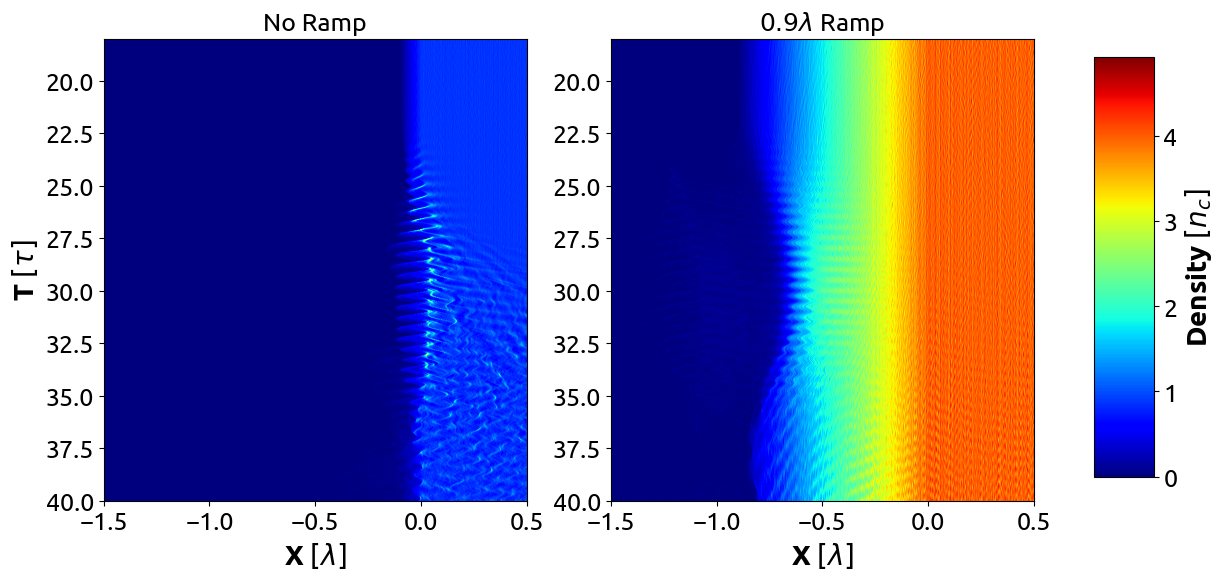

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_one_d("run_1", axes[0], "No Ramp")
plot_one_d("run_9", axes[1], "$0.9\lambda$ Ramp", False)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(axes[1].images[0], cax=cbar_ax)
#colorbar title
cbar_ax.set_ylabel("Density $[n_c]$")

In [4]:
fig_path = "/media/hari31416/Hari_SSD/Users/harik/Desktop/MSc_Project/Presentations/PPTs/Sem_4_Major/images/"
fig.savefig(fig_path + "ramp_d.png", bbox_inches="tight")